## Import data

In [116]:
import pandas as pd

dataset = pd.read_csv('Cancer.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [117]:
dataset.head()

,0.063915,0.033242,0.018484,0.0086177,0.035629,0.037925,0.028865,0.061731,0.0631,0.024787,...,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,C
0,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,...,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,C
1,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,...,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,C
2,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,...,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,C
3,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,...,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,C
4,0.039048,0.039355,0.001343,0.026221,0.044091,0.043953,0.039629,0.047926,0.046892,0.030589,...,0.065494,0.030681,0.039686,0.037256,0.022888,0.056221,0.055819,0.010087,0.006004,C


## Encoding the output data

In [118]:
from sklearn.preprocessing import LabelEncoder

# Encode labels 'C' and 'N'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Part A: PCA and Plot PC1-PC2

### Perform PCA

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pc_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

### Plot PC1-PC2

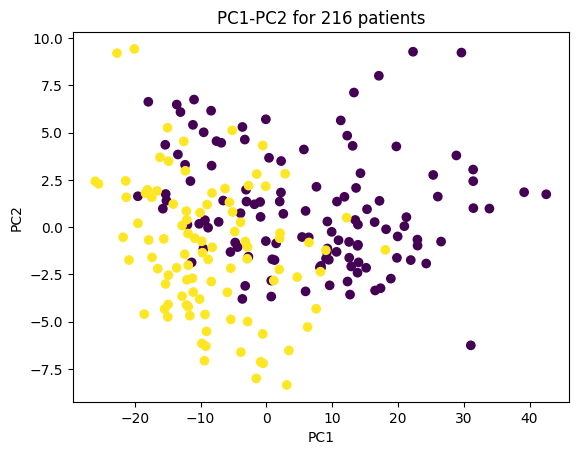

In [120]:
import matplotlib.pyplot as plt

plt.scatter(pc_df['PC1'], pc_df['PC2'], c=y, cmap='viridis')
plt.title('PC1-PC2 for 216 patients')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Part B: Calculate Information Preservation

Create a PCA object with 10 components and fit with data

In [121]:
pca = PCA(n_components=10)
X_pca_10 = pca.fit_transform(X)

Check preserved data

In [122]:
explained_variance_ratio = pca.explained_variance_ratio_
info_preserved = sum(explained_variance_ratio[:10]) * 100
print(f'Percentage of information preserved: {info_preserved:.2f}%')

Percentage of information preserved: 97.22%


### Analysis

By using the first 10 principal components, we are able to preserve 97.22% of the information, showing a very good dimensionality reduction, which retains the dataset's critical characteristics while significantly reducing its complexity. This means that it is possible to significantly reduce the feature space without sacrificing much of the data's essential information.

## Part C: Build an ANN Classifier

Build the ANN with the first 10 PCs

In [123]:
X_pca = pca.transform(X)

Split the data into training and testing sets

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Feature scaling

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Build and train the model

In [178]:
import tensorflow as tf

# Build ANN model
model = tf.keras.Sequential([
    # Input layer, 10 principal components
    tf.keras.layers.Input(shape=(10,)),

    # More hidden layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    # Output layer, binary
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Epoch 1/10
6/6 [==============================] - 1s 5ms/step - loss: 0.6878 - accuracy: 0.5872
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.6512
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.7442
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.5077 - accuracy: 0.8430
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 0.4609 - accuracy: 0.8953
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.9302
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.3549 - accuracy: 0.9302
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 0.3004 - accuracy: 0.9244
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 0.2607 - accuracy: 0.9419
Epoch 10/10
2/2 [==============================] - 0s 7ms/step - loss: 0.2292 - accuracy: 0.9535
Model Accuracy: 0.95


## Try other classifiers

### KNN

In [179]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9767441860465116


### Naive Bayes

In [180]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9302325581395349


### SVM

In [181]:
from sklearn.svm import SVC

svmrbf = SVC(kernel='rbf')
svmrbf.fit(X_train, y_train)
y_pred = svmrbf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9302325581395349


### Analysis

As we can see the ANN performs well in comparison to the KNN, NB, and SVM models for this particular task. The ANN performs second best when it comes to accuracy with only the KNN model performing slightly better with an accuracy of ~0.977 compared to the ANN with an accuracy of 0.95. The other two models, the NB and SVM, also perform quite well, both with accuracies of 0.93.